# Data analysis

In [1]:
import os
import matplotlib as mplt
import matplotlib.pyplot as plt
import numpy as np


from assignment_3.clustering.io import download_dataset, read_dataset
from assignment_3.clustering.settings import get_root_dir, IMAGES
from assignment_3.clustering.utils import chunks, plot_digit

## Download Dataset

In [2]:
#download_dataset()

## Reading Dataset

In [3]:
data = read_dataset()
X, y = data

2023-02-15 11:30:34.960 | INFO     | assignment_3.clustering.io:read_dataset:42 - Reading datasets


In [4]:
SIZE = 28

In [5]:
X.head(10)

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
y[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=int64)

In [7]:
X.describe()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,70000.0,...,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.0,70000.0,70000.0,70000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000774,0.000390,0.000183,0.000065,0.000051,0.000007,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.023495,0.016691,0.010917,0.006125,0.006093,0.001258,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.996078,0.996078,0.992157,0.992157,0.996078,0.243137,0.0,0.0,0.0,0.0


## Visualizing data

In [8]:
def plot(row_idx: int, save: bool = False, file_name = 'image.png'):
    pixels = chunks(lst=list(X.iloc[row_idx,:].values), n=SIZE)
    plot_digit(pixels=pixels, save=save, file_name=file_name)

2023-02-15 11:30:41.510 | INFO     | assignment_3.clustering.utils:plot_digit:78 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\0.png
2023-02-15 11:30:41.585 | INFO     | assignment_3.clustering.utils:plot_digit:78 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\1.png
2023-02-15 11:30:41.650 | INFO     | assignment_3.clustering.utils:plot_digit:78 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\2.png
2023-02-15 11:30:41.720 | INFO     | assignment_3.clustering.utils:plot_digit:78 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\3.png
2023-02-15 11:30:41.785 | INFO     | assignment_3.clustering.utils:plot_digit:78 - Saving C:\Users\user\Documents\GitHub\AI_assignments\assignment_3\clustering\images\4.png
2023-02-15 11:30:41.840 | INFO     | assignment_3.clustering.utils:plot_digit:78 - Saving C:\Users\user\Documents\GitHub\AI_assignments

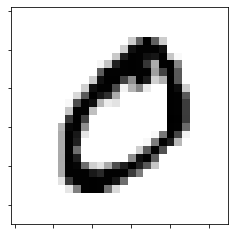

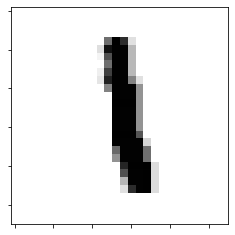

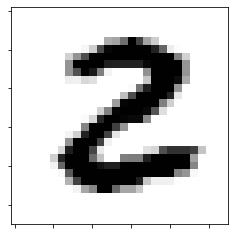

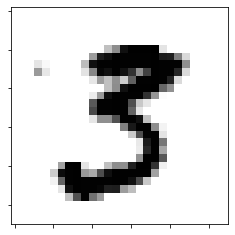

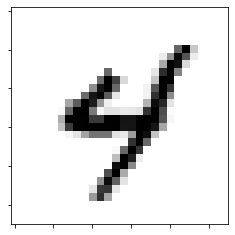

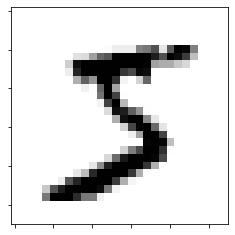

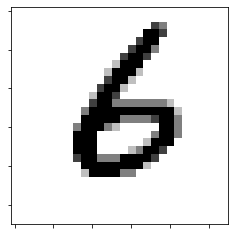

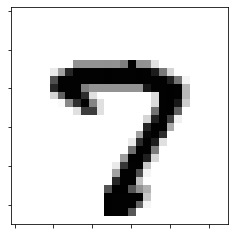

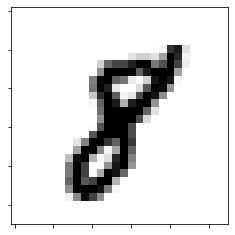

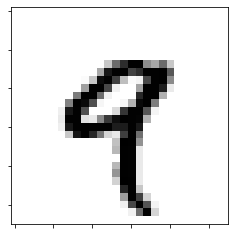

In [9]:
for idx, n in zip(
    [1, 6, 25, 49, 115, 0, 66, 52, 17, 4],
    list(range(10))
):
    plot(row_idx=idx, save=True, file_name=f'{n}.png')

## Digit distribution

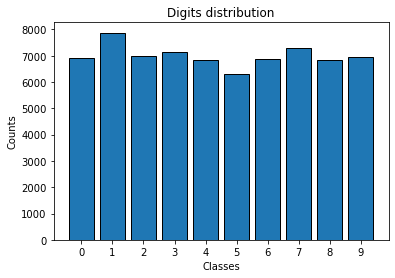

In [10]:
data.digit_distribution(save=True, file_name='histo.png')

## Digit visualization

In [17]:
def plot_2d(save: bool = False, file_name: str = '2dim.png'):
    """
    Plot digits in a 2-dimensional space
    :param save: saving plot to image directory
    :param file_name: name of output file
    """

    # principal component analysis producing two components
    X2, y2 = data.make_pca(n_components=2)

    # colors
    colors = ['red', 'orange', 'yellow', 'green', 'cyan', 'blue', 'magenta', 'purple', 'black', 'gray']

    # plotting points
    plt.figure(figsize=(8,8))
    plt.scatter(X2[:,0], X2[:,1], c=y2, cmap=mplt.colors.ListedColormap(colors), alpha=0.7)

    #
    plt.title("Digits - 2 Components")

    # legend
    cb = plt.colorbar()
    loc = np.arange(0,max(y2),max(y2)/float(len(colors)))
    cb.set_ticks(loc)
    cb.set_ticklabels([n for n in list(range(10))])

    if save:
        out = os.path.join(get_root_dir(), IMAGES, file_name)
        plt.savefig(out)


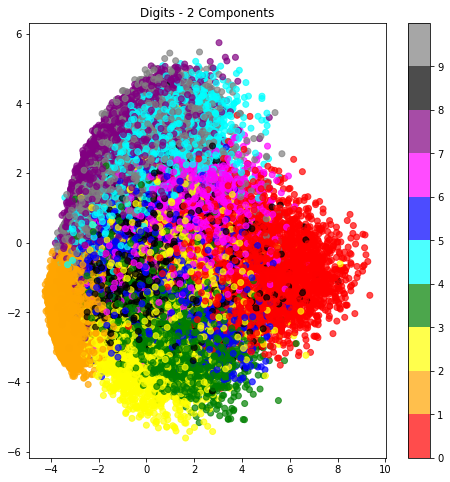

In [18]:
plot_2d(save=True)

## Feature selection

Look for pixels that are 0 in each of 70000 images.

In [11]:
always_zero = [c for c in list(X.columns) if sum(X.loc[:, c]) == 0]
len(always_zero)

65

We can drop 65 informationless columns

In [12]:
X.drop(columns=always_zero, axis=1, inplace=True)